# Hot task

In [1]:
from matplotlib import pyplot as plt
import torch

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [3]:
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
print(t_c.shape)
print(t_u.shape)

torch.Size([11])
torch.Size([11])


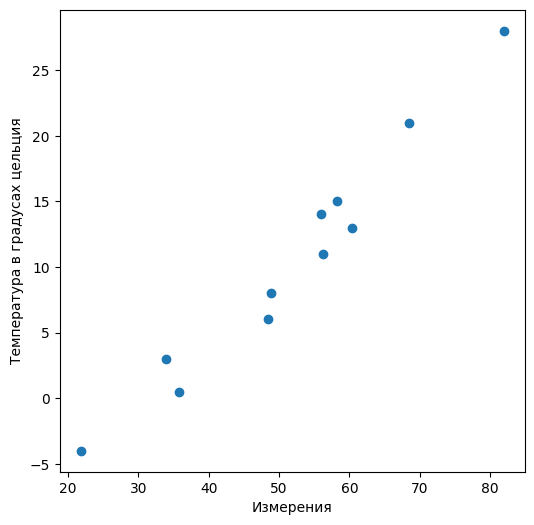

In [8]:
plt.figure(figsize=(6, 6))
plt.subplot(111)
plt.scatter(t_u, t_c)
plt.ylabel('Температура в градусах цельция')
plt.xlabel('Измерения')
plt.show()

In [10]:
# linear model
def model(t_u, w, b):
    return w * t_u + b

In [16]:
# loss function
def loss_fn(t_p, t_c):
    square_diffs = (t_p - t_c)**2
    return square_diffs.mean()

In [13]:
# w and b values initialising
w = torch.ones(())
b = torch.zeros(())
print(w)
print(b)

tensor(1.)
tensor(0.)


In [14]:
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [17]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [ ]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [19]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [20]:
w

tensor(-44.1730)

In [21]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b     
b

tensor(46.)

In [23]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs


def dmodel_dw(t_u, w, b):
    return t_u


def dmodel_db(t_u, w, b):
    return 1.0        

In [27]:
# Функция, возвращающая градиент потерь относительно w и b

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [28]:
grad_fn(t_u, t_c, t_p, w, b)

tensor([4517.2964,   82.6000])

In [30]:
# training circle
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params    

In [65]:
n_epochs = 5000
learning_rate = 1e-2
params = torch.tensor([1.0, 0.0])

In [82]:
training_loop(
    n_epochs,
    learning_rate,
    params,
    t_u = t_u,
    t_c = t_c
)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 5802484.500000
Epoch 3, Loss 19408029696.000000
Epoch 4, Loss 64915905708032.000000
Epoch 5, Loss 217130525461053440.000000
Epoch 6, Loss 726257583152928129024.000000
Epoch 7, Loss 2429183416467662896627712.000000
Epoch 8, Loss 8125122549611731432050262016.000000
Epoch 9, Loss 27176882120842590626938030653440.000000
Epoch 10, Loss 90901105189019073810297959556841472.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss

tensor([nan, nan])

In [84]:
# normalising of input signals
t_un = 0.1 * t_u

In [87]:
params = training_loop(
    n_epochs,
    learning_rate,
    params,
    t_u = t_un,
    t_c = t_c
)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

In [88]:
params

tensor([  5.3671, -17.3012])

In [89]:
t_p = model(t_un, *params)
t_p

tensor([ 1.8593, 12.7008, 13.9352, 26.6552, 12.9155,  8.9439,  0.8932, -5.6009,
         8.6755, 15.1160, 19.4097])

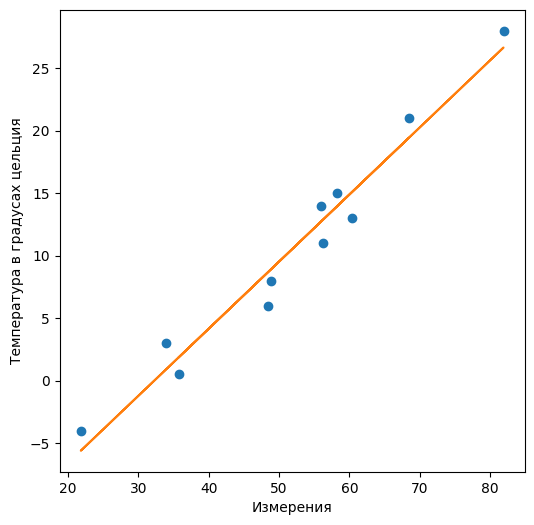

In [90]:
plt.figure(figsize=(6, 6))
plt.subplot(111)
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.ylabel('Температура в градусах цельция')
plt.xlabel('Измерения')
plt.show()